In [0]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [117]:
data = pd.read_csv('Petersburg Station Weather Data.csv')
date = pd.to_datetime(data['DATE'],format='%Y%m%d')
data['month']=date.dt.month
data['day']=date.dt.day
data

,DATE,DLY-TMIN-NORMAL,DLY-TMAX-NORMAL,PRECIPITATION,TEMP-LOW,TEMP-HIGH,month,day
0,20100101,-33,145,2,-3.3,14.5,1,1
1,20100102,-35,144,4,-3.5,14.4,1,2
2,20100103,-36,143,5,-3.6,14.3,1,3
3,20100104,-38,142,7,-3.8,14.2,1,4
4,20100105,-39,141,9,-3.9,14.1,1,5
5,20100106,-41,140,10,-4.1,14.0,1,6
6,20100107,-42,140,12,-4.2,14.0,1,7
7,20100108,-43,139,13,-4.3,13.9,1,8
8,20100109,-44,139,15,-4.4,13.9,1,9
9,20100110,-45,139,17,-4.5,13.9,1,10


In [0]:
temp_diff = data['TEMP-HIGH']-data['TEMP-LOW']

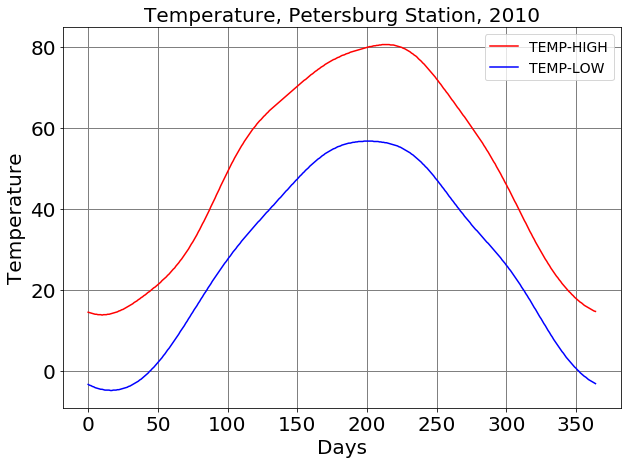

In [73]:
f, ax = plt.subplots(1,figsize=(10,7))
ax.plot(data['TEMP-HIGH'], c = 'red', label='TEMP-HIGH')

ax.plot(data['TEMP-LOW'],c = 'blue', label='TEMP-LOW')
ax.set_xlabel('Days', fontsize = 20)
ax.set_ylabel('Temperature',fontsize = 20)
ax.set_title('Temperature, Petersburg Station, 2010',fontsize = 20)
ax.tick_params(labelsize = 20)
ax.legend(loc = 'upper right', fontsize = 14)
ax.grid(color='gray', linestyle='-', linewidth=1, zorder = 1)

#ax.fill_between(data.index, data['TEMP-LOW'], data['TEMP-HIGH'], facecolor = 'black', interpolate=True)
#ax.scatter(data['TEMP-HIGH'], data['PRECIPITATION'], c = 'red', label='TEMP-HIGH', zorder=2)

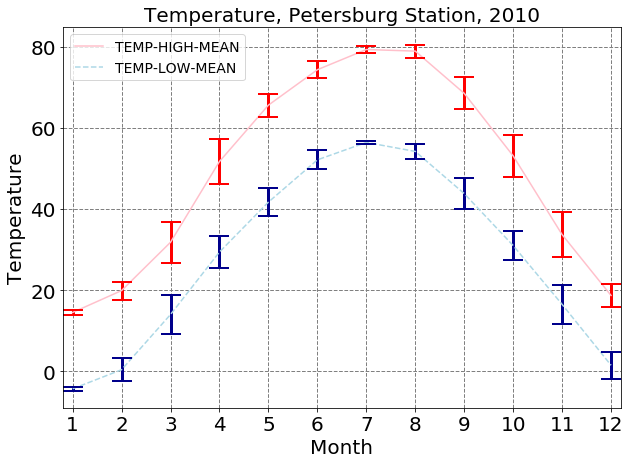

In [126]:
temp_high_mean=[]
temp_high_std=[]
temp_low_mean=[]
temp_low_std=[]
month = range(1,13)
for i in range(1,13):
  temp_high_mean.append(np.mean(data['TEMP-HIGH'].loc[data['month'] == i]))
  temp_low_mean.append(np.mean(data['TEMP-LOW'].loc[data['month'] == i]))
  temp_high_std.append(np.std(data['TEMP-HIGH'].loc[data['month'] == i]))
  temp_low_std.append(np.std(data['TEMP-LOW'].loc[data['month'] == i]))
f, ax = plt.subplots(1,figsize=(10,7))
ax.plot(month,temp_high_mean,c = 'pink', label='TEMP-HIGH-MEAN')
ax.plot(month,temp_low_mean,c = 'lightblue', label='TEMP-LOW-MEAN',ls='--')
ax.errorbar(month,temp_high_mean,temp_high_std,color = 'red',ls='',capsize=10, elinewidth=3, markeredgewidth=2)
ax.errorbar(month,temp_low_mean,temp_low_std,color = 'darkblue',ls='',capsize=10, elinewidth=3, markeredgewidth=2)
ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('Temperature',fontsize = 20)
ax.set_title('Temperature, Petersburg Station, 2010',fontsize = 20)
ax.tick_params(labelsize = 20)
ax.legend(loc = 'best', fontsize = 14)
ax.grid(color='gray', linestyle='--', linewidth=1, zorder = 1)
ax.set_xlim(0.8, 12.2)
ax.set_xticks(np.arange(1, 13, 1.0))